### Escalado y Normalización de Variables

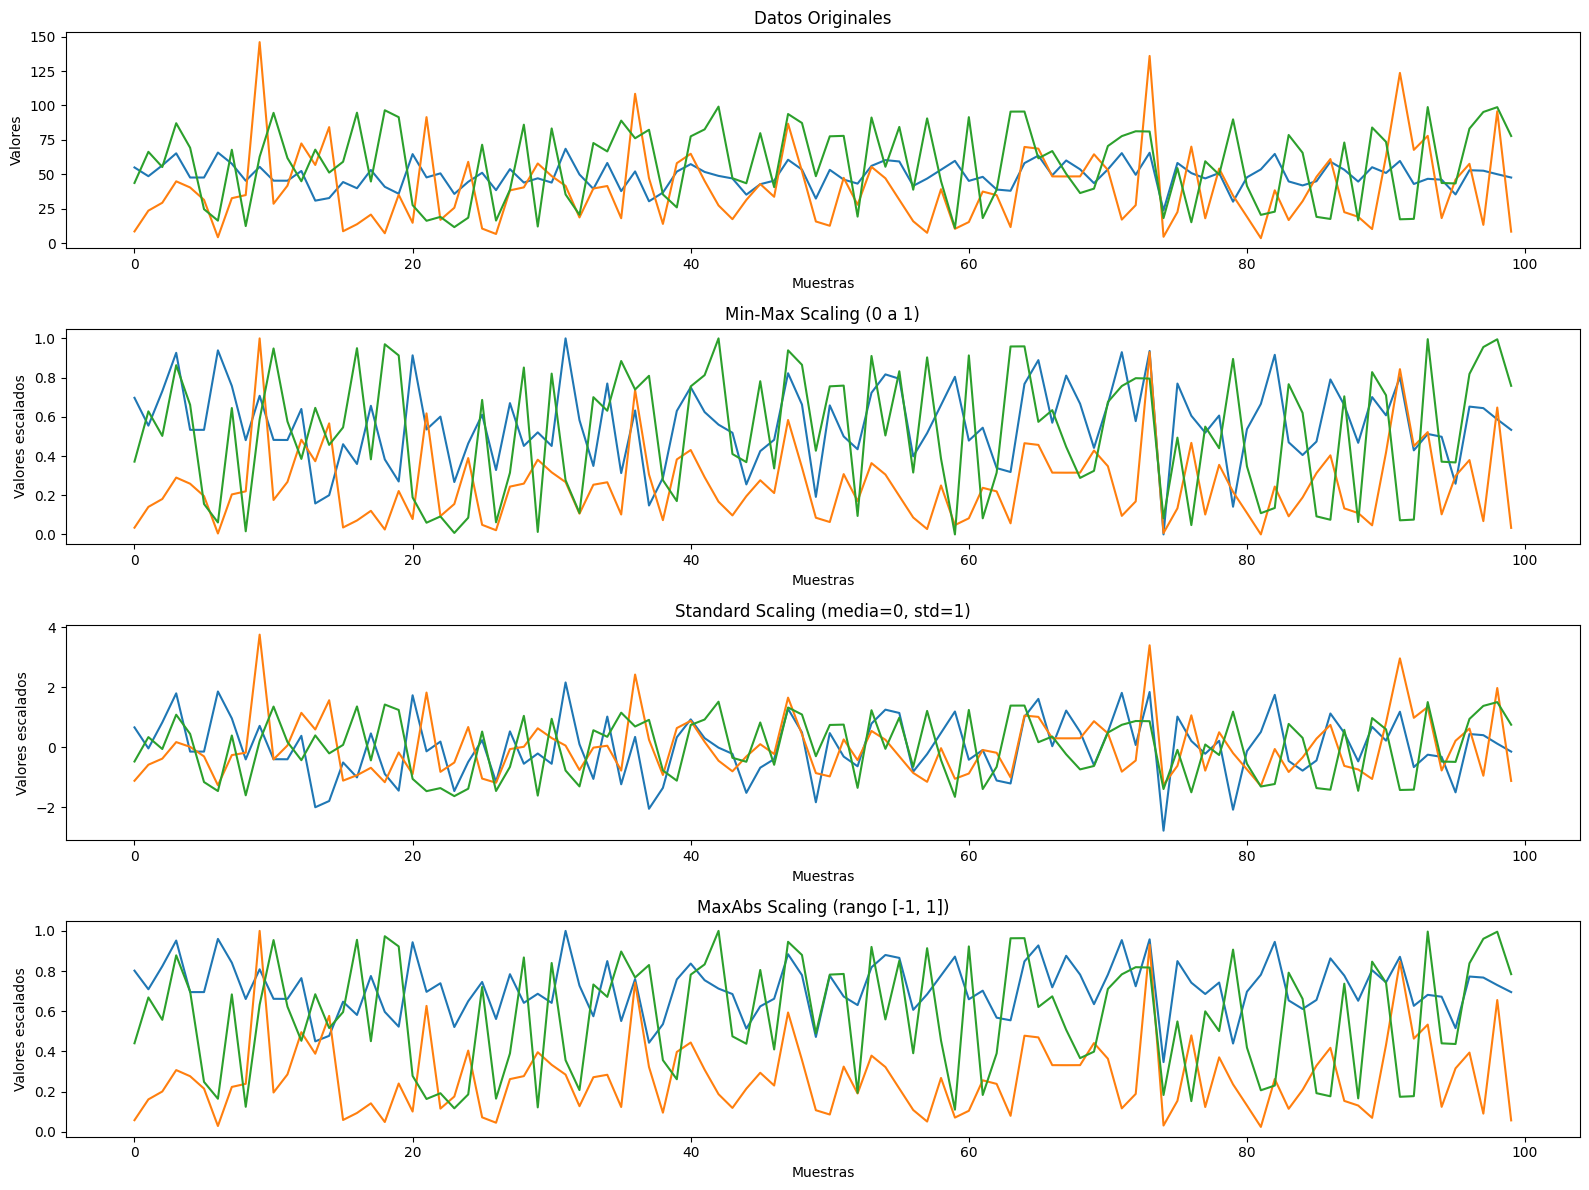

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

# 1. Generar datos con distribuciones diferentes
np.random.seed(42)
data = np.array([
    np.random.normal(50, 10, 100),   # Distribución Normal (media=50, std=10)
    np.random.gamma(2, 20, 100),     # Distribución Gamma
    np.random.uniform(10, 100, 100)  # Distribución Uniforme entre 10 y 100
]).T  # Transpuesta para tener 100 filas y 3 columnas

# 2. Escalar los datos usando diferentes métodos

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)

# Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# MaxAbs Scaling
maxabs_scaler = MaxAbsScaler()
data_maxabs_scaled = maxabs_scaler.fit_transform(data)

# 3. Visualizar los datos originales y escalados
plt.figure(figsize=(16, 12))

# Plot original data
plt.subplot(4, 1, 1)
plt.title('Datos Originales')
plt.plot(data)
plt.xlabel('Muestras')
plt.ylabel('Valores')

# Plot Min-Max Scaled data
plt.subplot(4, 1, 2)
plt.title('Min-Max Scaling (0 a 1)')
plt.plot(data_min_max_scaled)
plt.xlabel('Muestras')
plt.ylabel('Valores escalados')

# Plot Standard Scaled data
plt.subplot(4, 1, 3)
plt.title('Standard Scaling (media=0, std=1)')
plt.plot(data_standard_scaled)
plt.xlabel('Muestras')
plt.ylabel('Valores escalados')

# Plot MaxAbs Scaled data
plt.subplot(4, 1, 4)
plt.title('MaxAbs Scaling (rango [-1, 1])')
plt.plot(data_maxabs_scaled)
plt.xlabel('Muestras')
plt.ylabel('Valores escalados')

plt.tight_layout()
plt.show()


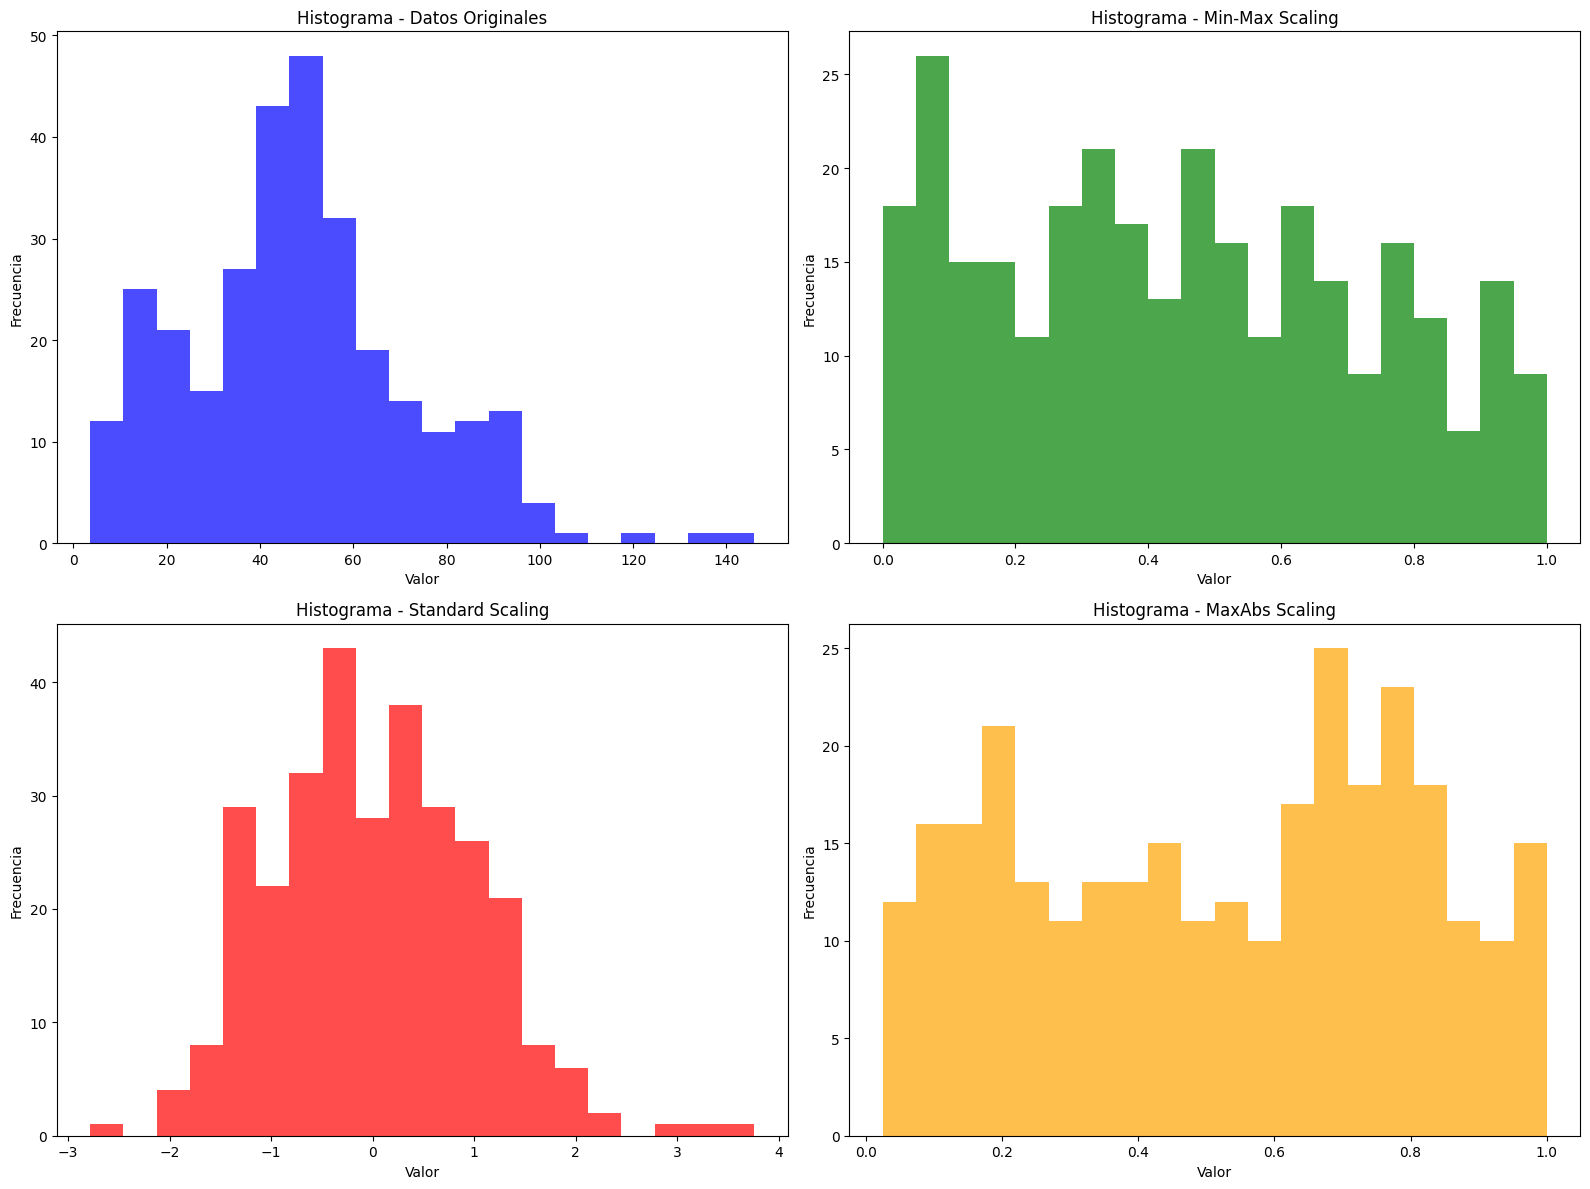

In [2]:
# 4. Visualización con histogramas para comparar distribuciones
plt.figure(figsize=(16, 12))

# Histograma de los datos originales
plt.subplot(2, 2, 1)
plt.hist(data.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Histograma - Datos Originales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma de los datos con Min-Max Scaling
plt.subplot(2, 2, 2)
plt.hist(data_min_max_scaled.flatten(), bins=20, color='green', alpha=0.7)
plt.title('Histograma - Min-Max Scaling')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma de los datos con Standard Scaling
plt.subplot(2, 2, 3)
plt.hist(data_standard_scaled.flatten(), bins=20, color='red', alpha=0.7)
plt.title('Histograma - Standard Scaling')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma de los datos con MaxAbs Scaling
plt.subplot(2, 2, 4)
plt.hist(data_maxabs_scaled.flatten(), bins=20, color='orange', alpha=0.7)
plt.title('Histograma - MaxAbs Scaling')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

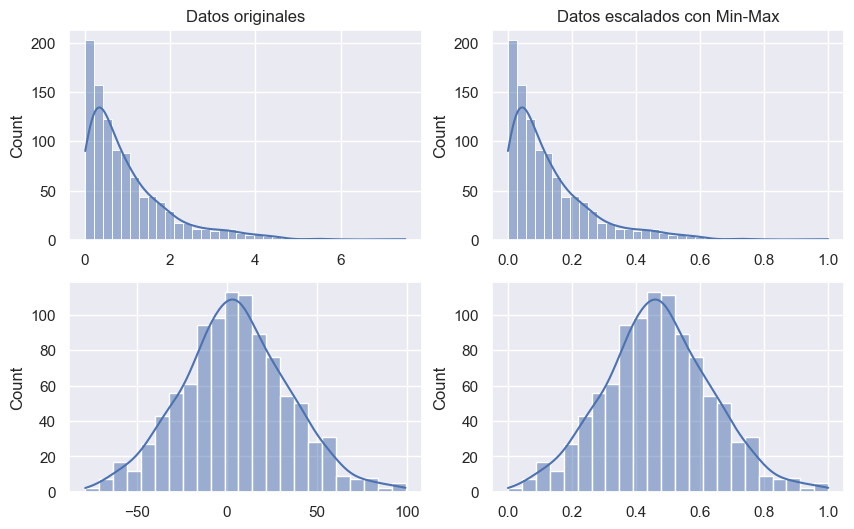

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
original_normal_data = np.random.normal(6, 30, 1000)

# Reshape de X a 2 dimensiones
X = original_data.reshape(1000, 1)
# Reshape de X a 2 dimensiones
X_normal = original_normal_data.reshape(1000, 1)

# mix-max scale the data between 0 and 1
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)
scaled_normal_data = min_max_scaler.fit_transform(X_normal)

# plot both together to compare
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(original_data, ax=ax[0,0], kde=True, legend=False)
ax[0,0].set_title("Datos originales")
sns.histplot(scaled_data, ax=ax[0,1], kde=True, legend=False)
ax[0,1].set_title("Datos escalados con Min-Max")

sns.histplot(original_normal_data, ax=ax[1,0], kde=True, legend=False)
#ax[1,0].set_title("Datos originales")
sns.histplot(scaled_normal_data, ax=ax[1,1], kde=True, legend=False)
#ax[1,1].set_title("Datos escalados con Min-Max")
plt.show()

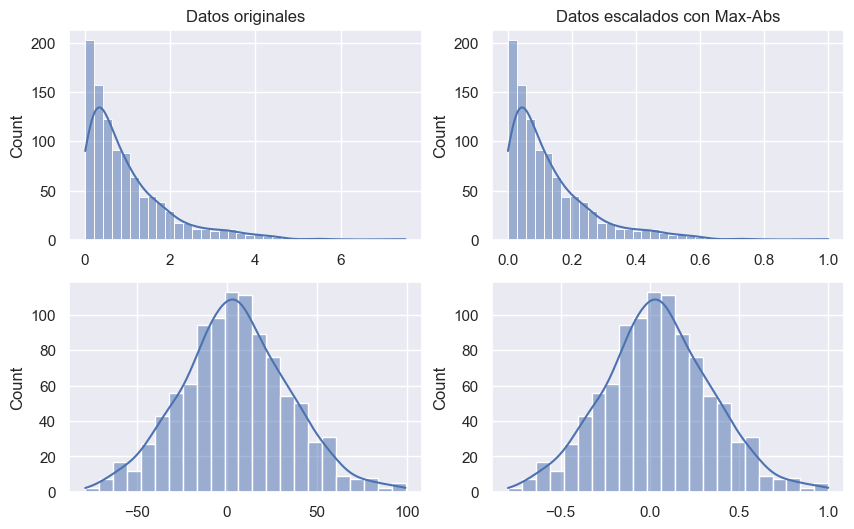

In [9]:
# MaxAbs Scaling
maxabs_scaler = MaxAbsScaler()
scaled_data = maxabs_scaler.fit_transform(X)
scaled_normal_data = maxabs_scaler.fit_transform(X_normal)

# plot both together to compare
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(original_data, ax=ax[0,0], kde=True, legend=False)
ax[0,0].set_title("Datos originales")
sns.histplot(scaled_data, ax=ax[0,1], kde=True, legend=False)
ax[0,1].set_title("Datos escalados con Max-Abs")

sns.histplot(original_normal_data, ax=ax[1,0], kde=True, legend=False)
#ax[1,0].set_title("Datos originales")
sns.histplot(scaled_normal_data, ax=ax[1,1], kde=True, legend=False)
#ax[1,1].set_title("Datos escalados con Min-Max")
plt.show()

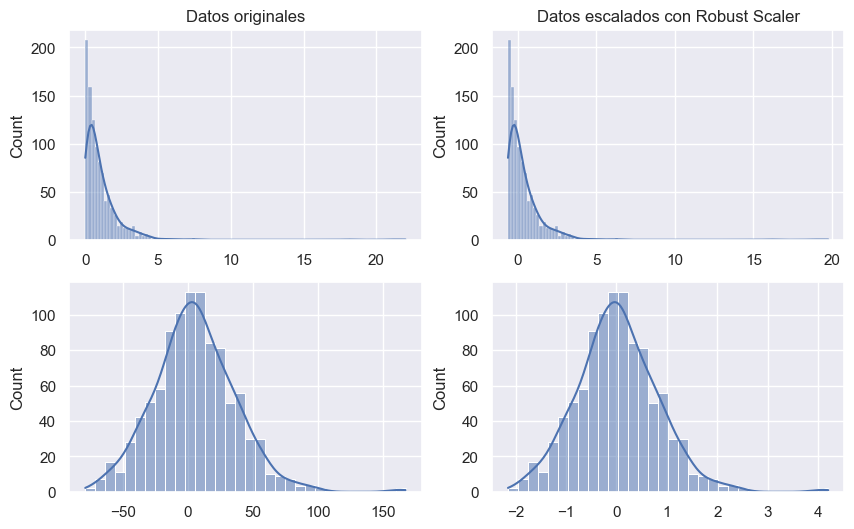

In [10]:
# Añadimos Outliers a la distribución original
# generate 1000 data points randomly drawn from an exponential distribution
original_data_outlier = np.append(original_data, [18,21,22])
original_normal_data_outlier = np.append(original_normal_data, [162,167,159])

# Reshape de X a 2 dimensiones
X = original_data_outlier.reshape(1003, 1)
# Reshape de X a 2 dimensiones
X_normal = original_normal_data_outlier.reshape(1003, 1)
# Robust  Scaling
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(X)
scaled_normal_data = robust_scaler.fit_transform(X_normal)

# plot both together to compare
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(original_data_outlier, ax=ax[0,0], kde=True, legend=False)
ax[0,0].set_title("Datos originales")
sns.histplot(scaled_data, ax=ax[0,1], kde=True, legend=False)
ax[0,1].set_title("Datos escalados con Robust Scaler")

sns.histplot(original_normal_data_outlier, ax=ax[1,0], kde=True, legend=False)
#ax[1,0].set_title("Datos originales")
sns.histplot(scaled_normal_data, ax=ax[1,1], kde=True, legend=False)
#ax[1,1].set_title("Datos escalados con Min-Max")
plt.show()

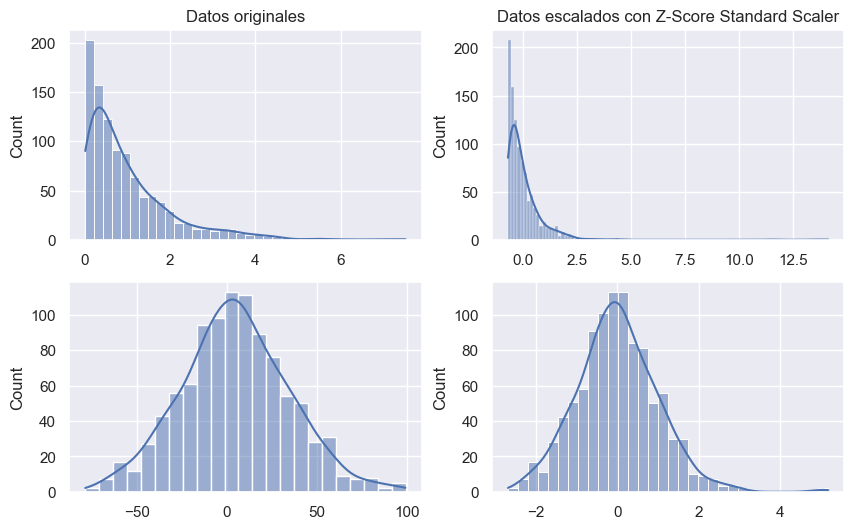

In [11]:
# Standard Scaling
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(X)
scaled_normal_data = std_scaler.fit_transform(X_normal)

# plot both together to compare
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(original_data, ax=ax[0,0], kde=True, legend=False)
ax[0,0].set_title("Datos originales")
sns.histplot(scaled_data, ax=ax[0,1], kde=True, legend=False)
ax[0,1].set_title("Datos escalados con Z-Score Standard Scaler")

sns.histplot(original_normal_data, ax=ax[1,0], kde=True, legend=False)
#ax[1,0].set_title("Datos originales")
sns.histplot(scaled_normal_data, ax=ax[1,1], kde=True, legend=False)
#ax[1,1].set_title("Datos escalados con Min-Max")
plt.show()

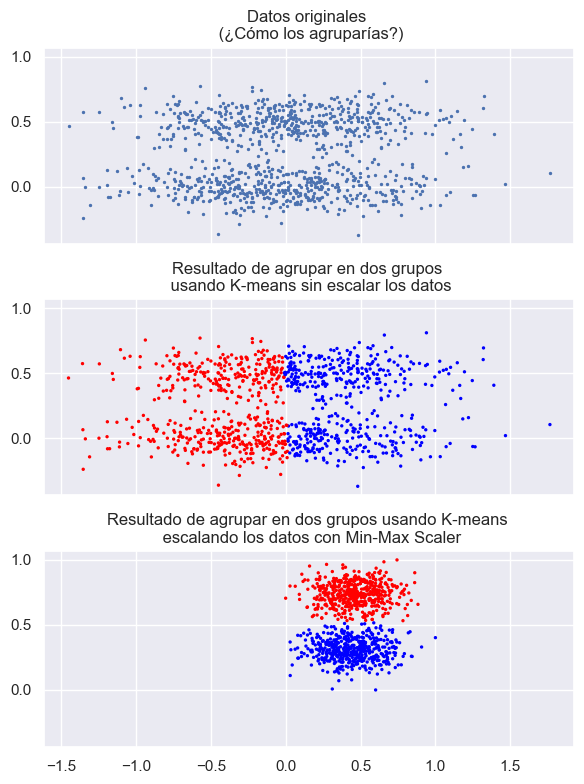

In [12]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


seaborn.set_theme()

rnorm = np.random.randn

x = rnorm(1000) / 2
y = np.concatenate([rnorm(500) + 5, rnorm(500)]) / 10

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 8))

axes[0].scatter(x, y, s=2)
axes[0].set_title("Datos originales \n (¿Cómo los agruparías?)")

km = KMeans(2)

clusters = km.fit_predict(np.array([x, y]).T)

axes[1].scatter(x, y, c=clusters, cmap="bwr", s=2)
axes[1].set_title("Resultado de agrupar en dos grupos \n usando K-means sin escalar los datos")


def normalise(vals):
    """Normalise values to fit between [0, 1]"""
    return (vals - min(vals)) / (max(vals) - min(vals))


xn = normalise(x)
yn = normalise(y)

clusters = km.fit_predict(np.array([xn, yn]).T)

axes[2].scatter(xn, yn, c=clusters, cmap="bwr", s=2)
axes[2].set_title("Resultado de agrupar en dos grupos usando K-means \n escalando los datos con Min-Max Scaler")

plt.tight_layout()

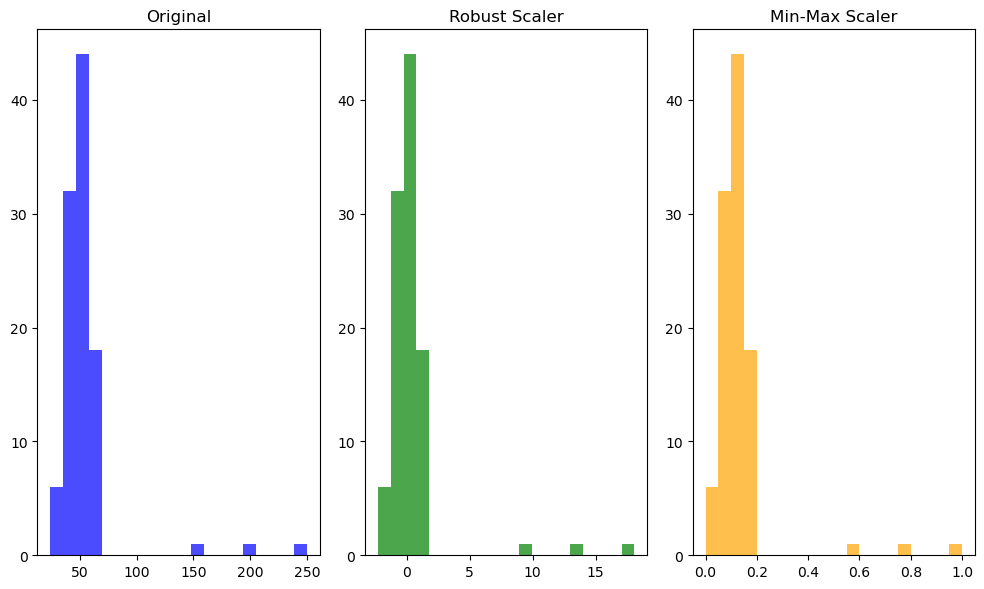

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Crear datos con outliers
np.random.seed(42)
data_con_outliers = np.append(np.random.normal(50, 10, 100), [150, 200, 250])

# Convertir los datos en un DataFrame para visualización
df = pd.DataFrame(data_con_outliers, columns=['Valor'])

# Aplicar el Robust Scaler
robust_scaler = RobustScaler()
df['Valor_robust_scaled'] = robust_scaler.fit_transform(df[['Valor']])

# Aplicar Min-Max Scaler para comparación
min_max_scaler = MinMaxScaler()
df['Valor_minmax_scaled'] = min_max_scaler.fit_transform(df[['Valor']])

# Graficar los datos originales y escalados
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(df['Valor'], bins=20, color='blue', alpha=0.7)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.hist(df['Valor_robust_scaled'], bins=20, color='green', alpha=0.7)
plt.title('Robust Scaler')

plt.subplot(1, 3, 3)
plt.hist(df['Valor_minmax_scaled'], bins=20, color='orange', alpha=0.7)
plt.title('Min-Max Scaler')

plt.tight_layout()
plt.show()
